# Image Classification

**Note:** This code was developed based on a tutorial from Code Basics on YouTube ([watch tutorial](https://www.youtube.com/watch?v=7HPwo4wnJeA&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=24&ab_channel=codebasics)). It was created for educational purposes. All comments and observations are my own, reflecting my learning process and understanding of the problem and its solution.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models # Keras is a high-level API used for building and training deep learning models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data() # cifar10 is the name of the dataset

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
X_train.shape # (samples, h, w, rgb channels)

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
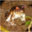

In [6]:
X_train[0]

Using "X_train[i]" we will receive an array that represents one image.

**Why So Many Vectors?:** Each "vector" or set of three numbers is just showing the color of one pixel. An image in CIFAR-10 is made up of 32x32 pixels, so there are 1,024 pixels in total. Each pixel needs three numbers to describe its color, hence the many sets of three numbers.

**Understanding the Shape:** When you access X_train[0], it shows you a single image, which is composed of 32 rows of 32 pixels, and each pixel has 3 values to define its color.

***Here's a more visual way to think about it:***
**Image:** One entire array from X_train[0].
**Rows of Pixels:** Each sub-array of size 32 you see when you expand X_train[0].
**Pixels:** Each smaller array of size 3 inside those sub-arrays.
**Color Values:** The three numbers inside each of these smallest arrays.
So, even though it looks complex, all we are seeing is a detailed, color-specific representation of just one 32x32 pixel image!

*Beginning of the row*
        [[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],
*End of the row*

Each row has 32 pixels. Each pixel has 3 values (RGB).

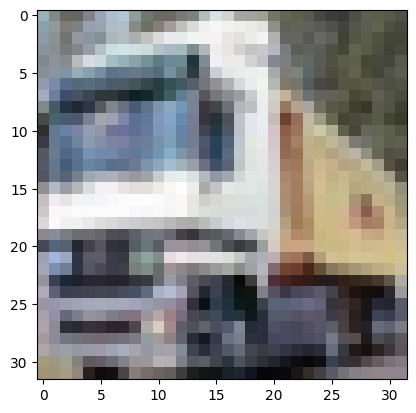

In [7]:
plt.imshow(X_train[1]) # shows the image with plt

Now, we are going to reshape the y_train to transform it in one list (without the reshape, it is a list of arrays.

In [8]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train = y_train.reshape(-1,) # I write -1 as the first parameter because I don't want to change the number of samples.
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Now I have an array that gives me a number from 0 to 9 depending on the class of the image. But I don't want to print the numbers, I want to print the name of the label.

In [10]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [11]:
def plot_img(X, y, index): # X, y is the X_train or X_test (same with the y) and index is the sample I want to print
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]]) # the index of the class will be nthe number of the label

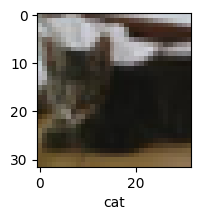

In [12]:
plot_img(X_train, y_train, 9)

Now it's time to normalize the data! We need to divide the values of each pixel by 255, so we will have values from 0 to 1 (instead of 0 to 255).

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid') # I have numbers of 0 to 9
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8135 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6260 - accuracy: 0.4257
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5442 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4844 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4338 - accuracy: 0.4950


In [15]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4949 - accuracy: 0.4749


[1.4949493408203125, 0.4749000072479248]

Now, lets use `classification_report` to see the metrics.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred] # Uses "np.argmax" to find the index of the highest score for each prediction. Element -> an array with the results.

print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.34      0.79      0.47      1000
           1       0.57      0.62      0.60      1000
           2       0.42      0.31      0.36      1000
           3       0.38      0.33      0.35      1000
           4       0.44      0.40      0.42      1000
           5       0.57      0.21      0.31      1000
           6       0.56      0.47      0.51      1000
           7       0.56      0.52      0.54      1000
           8       0.64      0.49      0.56      1000
           9       0.52      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.47     10000
weighted avg       0.50      0.47      0.47     10000



As we see, the accuracy is very very low (0.45). Let's implement a cnn and see what changes!

In [17]:
cnn = models.Sequential([
    # convolution neural network
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)), # Can detect 32 features
    layers.MaxPooling2D(2,2), # Max, average...

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # dense network
    layers.Flatten(),
    layers.Dense(64, activation='relu'), # I don't need so many neurons and so many layers now that I'm using cnn.
    layers.Dense(10, activation='softmax') # Returns me a array of probabilities.
])

Note: Softmax is a function used convert a set of numbers into probabilities, which are easier to handle in classification tasks. It does this by first taking the exponential of each value to ensure all numbers are positive and to exaggerate differences, and then normalizing these values so that their total equals one. This results in a vector where each element represents the probability of a corresponding category, making it particularly useful in scenarios where a model needs to determine the likelihood of multiple different outcomes.

In [18]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4659 - accuracy: 0.4751
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1132 - accuracy: 0.6122
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9838 - accuracy: 0.6571
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9062 - accuracy: 0.6842
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8445 - accuracy: 0.7098
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7951 - accuracy: 0.7260
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7459 - accuracy: 0.7413
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7094 - accuracy: 0.7550
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6758 - accuracy: 0.7677
Epoch 10/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.639

If you compare with ANN, you can se that CNN have a better accuracy and a smaller loss.

In [20]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8939 - accuracy: 0.6982


[0.8939352631568909, 0.698199987411499]

In [21]:
y_pred_c = cnn.predict(X_test)
y_pred_classes_c = [np.argmax(element) for element in y_pred_c]

print(classification_report(y_test, y_pred_classes_c))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      1000
           1       0.76      0.88      0.82      1000
           2       0.58      0.62      0.60      1000
           3       0.49      0.51      0.50      1000
           4       0.70      0.58      0.63      1000
           5       0.68      0.52      0.59      1000
           6       0.70      0.84      0.76      1000
           7       0.75      0.74      0.75      1000
           8       0.81      0.79      0.80      1000
           9       0.85      0.71      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



Precision: It is the ratio of correct predictions for a class among all predictions made for that class.

Recall: Represents the proportion of actual cases of a class that were correctly identified by the model.

F1-Score: It is a harmonic mean between precision and recall, providing a single number that balances these two metrics.

Support: Refers to the number of occurrences of each actual class in the dataset.

# Exercise:

Use CNN to do handwritten digits classification using MNIST dataset.

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Getting the dataset from `keras.datasets`

In [40]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
y_train # notice that in the image datasets, the "y" was an array of arrays. Now, it is only an array.

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
X_train[0].shape # We have 28x28 pixels in each image.

(28, 28)

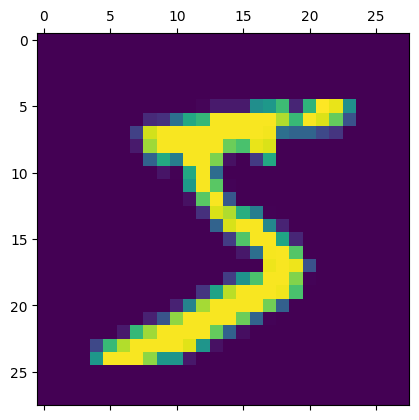

In [26]:
plt.matshow(X_train[0])


Now let's normalize the data.

In [43]:
X_train = X_train / 255
X_test = X_test / 255

Let's build the model without using cnn.

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # This transforms the 2D 28x28 image into a 1D array of 784 elements
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2787 - accuracy: 0.9206
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9874
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0276 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9774


[0.07718881964683533, 0.977400004863739]

Now, let's aply some cnn layers in this model:

In [45]:
y_train.shape

(60000,)

In [52]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=56, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=16, kernel_size=(4,4), activation='relu'),
    layers.MaxPooling2D(2,2),

    keras.layers.Flatten(), # This transforms the 2D 28x28 image into a 1D array of 784 elements
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.1613 - accuracy: 0.9516
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0560 - accuracy: 0.9827
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0389 - accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0241 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9962
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.01

In [53]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0397 - accuracy: 0.9902


[0.03971210867166519, 0.9901999831199646]

In [54]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.97      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

